In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
## Loading the dataset

In [3]:
glass_dt=pd.read_csv('glass.csv')
glass_dt.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass_dt.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
glass_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
glass_dt.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

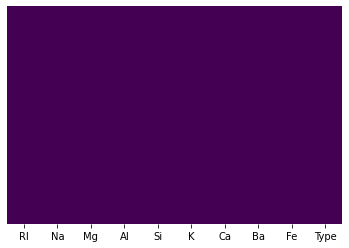

In [7]:
sns.heatmap(glass_dt.isna(),cmap='viridis',cbar=False,yticklabels=False)

In [8]:
## Checking for duplicate values

In [9]:
glass_dt[glass_dt.duplicated()].shape

(1, 10)

In [10]:
glass_dt.drop_duplicates(inplace=True)

In [11]:
glass_dt.shape

(213, 10)

In [12]:
glass_dt.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Summary Statistics

In [13]:
glass_dt.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Understanding the target Variable

In [14]:
glass_dt['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

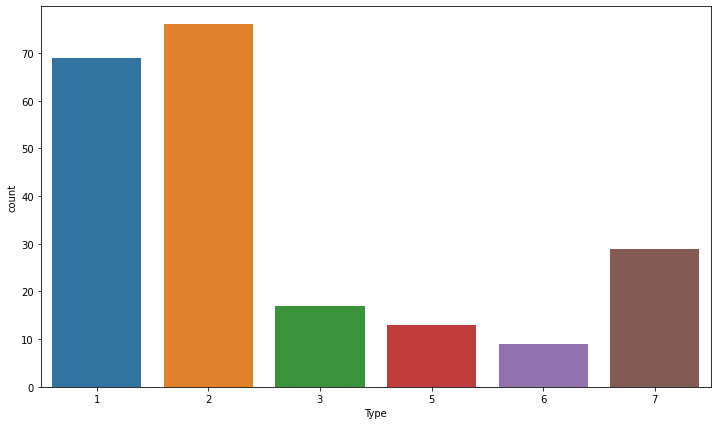

In [15]:
plt.subplots(figsize=(12,7))
sns.countplot(x='Type',data=glass_dt)

In [16]:
glass_dt.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

## Data Visualization

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RI'>

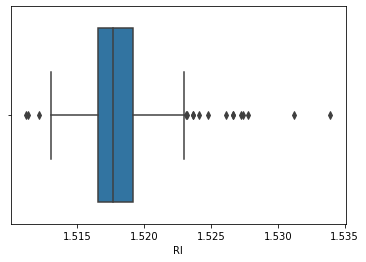

In [17]:
sns.boxplot(glass_dt['RI'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Na'>

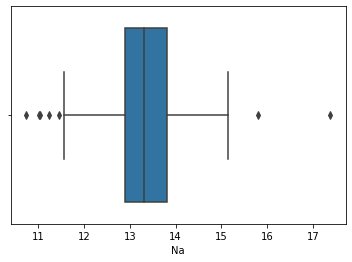

In [18]:
sns.boxplot(glass_dt['Na'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mg'>

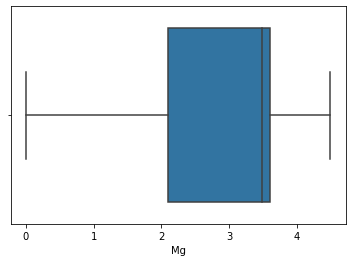

In [19]:
sns.boxplot(glass_dt['Mg'])

In [20]:
'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'

('Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type')

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Al'>

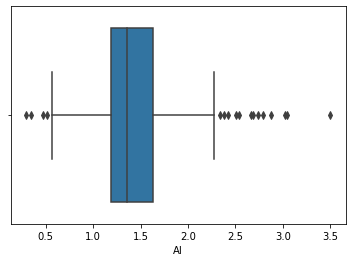

In [21]:
sns.boxplot(glass_dt['Al'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Si'>

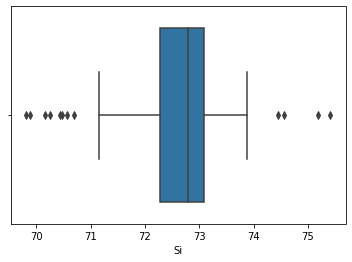

In [22]:
sns.boxplot(glass_dt['Si'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='K'>

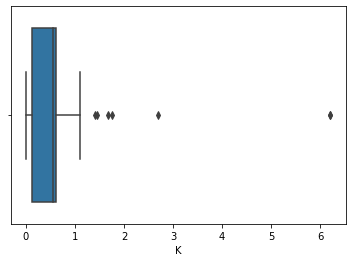

In [23]:
sns.boxplot(glass_dt['K'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ca'>

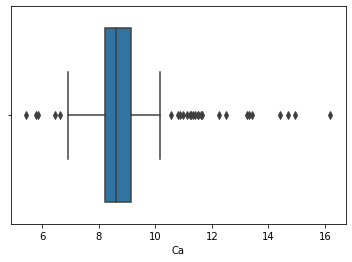

In [24]:
sns.boxplot(glass_dt['Ca'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ba'>

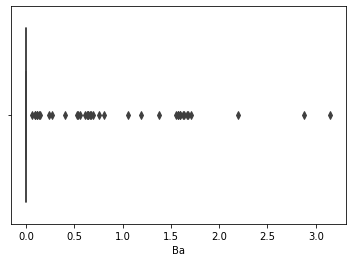

In [25]:
sns.boxplot(glass_dt['Ba'])

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fe'>

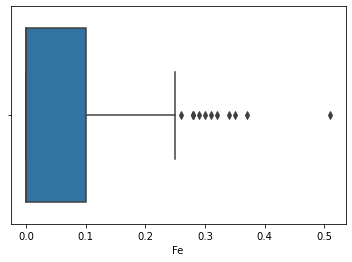

In [26]:
sns.boxplot(glass_dt['Fe'])

## Distplots


C:\Users\samee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mg', ylabel='Density'>

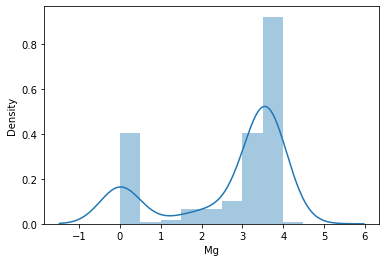

In [27]:
sns.distplot(glass_dt['Mg'])

In [28]:
glass_dt.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
glass_dt1=glass_dt.copy()

In [30]:
glass_dt1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
glass_dt['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [32]:
X=glass_dt.iloc[:,0:-1]
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [33]:
Y=glass_dt['Type']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

## Resampling

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm=SMOTE()

In [36]:
x_resample,y_resample=sm.fit_resample(X,Y)

In [37]:
x_resample.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [38]:
y_resample.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: Type, dtype: int64

## Lets Do Model Building

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(x_resample,y_resample,
                                              test_size=0.3,random_state=0)

In [41]:
X_train.shape

(319, 9)

In [42]:
X_test.shape

(137, 9)

## Using Grid Search CV

In [43]:
from sklearn.model_selection import GridSearchCV


In [44]:
clf=KNeighborsClassifier()

In [45]:
params = {'n_neighbors': [1,2,3,4,5], 
              'weights': ['uniform','distance'],
              'metric': ['minkowski','euclidean','manhattan']} 

In [46]:
grid_search=GridSearchCV(estimator=clf,param_grid=params,cv=10,
                         return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [47]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [48]:
model=KNeighborsClassifier(n_neighbors=1,metric='minkowski',weights='uniform')

In [49]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
## Predicting on Test and Train

ypred_train=model.predict(X_train)


In [51]:
pred_knn_test=model.predict(X_test)
pred_knn_test

array([2, 1, 3, 3, 6, 5, 2, 2, 6, 7, 1, 6, 5, 6, 2, 6, 3, 2, 2, 1, 2, 1,
       3, 7, 2, 6, 5, 3, 7, 5, 1, 3, 5, 3, 3, 7, 6, 3, 1, 3, 5, 6, 2, 6,
       6, 7, 1, 7, 7, 6, 7, 6, 7, 7, 5, 1, 5, 5, 2, 1, 7, 2, 1, 3, 7, 5,
       3, 7, 6, 6, 5, 5, 6, 5, 5, 3, 6, 6, 7, 1, 1, 3, 6, 3, 3, 5, 3, 1,
       7, 3, 6, 7, 1, 1, 2, 3, 3, 1, 7, 1, 3, 5, 1, 3, 1, 6, 2, 2, 3, 2,
       1, 3, 6, 3, 1, 6, 1, 5, 6, 1, 5, 3, 6, 7, 3, 2, 3, 1, 2, 5, 1, 5,
       7, 1, 7, 7, 6], dtype=int64)

In [52]:
print(classification_report(Y_test,pred_knn_test))

              precision    recall  f1-score   support

           1       0.73      0.68      0.70        28
           2       0.76      0.62      0.68        21
           3       0.79      0.96      0.86        23
           5       1.00      1.00      1.00        20
           6       0.96      1.00      0.98        24
           7       1.00      1.00      1.00        21

    accuracy                           0.87       137
   macro avg       0.87      0.88      0.87       137
weighted avg       0.87      0.87      0.86       137



In [53]:
## Thus, we have prepared a model for glass classification using KNN